In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [11]:
TT = pd.read_csv("train.csv")


## Практика использования Pandas

In [12]:
TT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
TT.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
TT.shape

(891, 12)

## Начнём работу

In [20]:
TT.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
s = TT.Survived.sum() # кол-во выживших
all = TT.PassengerId.count() # всего пассажиров
ps = s/all*100 # процент выживаемости
print(ps)

38.38383838383838


#### Выжило меньше половины. Обидно, досадно, но ладно

## Мужчины или женщины?

#### Предположим, что выживших мужчин больше, чем женщин, так как они более физически подготовлены

In [27]:
TT.Sex.value_counts() # посмотрим, сколько было мужчин и женщин на корабле

male      577
female    314
Name: Sex, dtype: int64

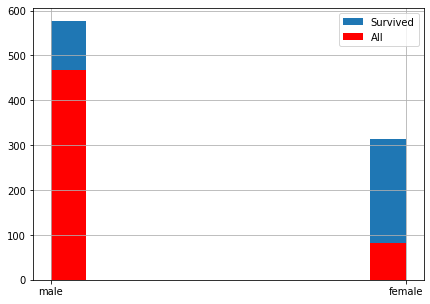

In [73]:
graf1 = TT.Sex.hist(figsize=(7, 5), bins=10)
TT[TT.Survived == 0].Sex.hist(figsize=(7, 5), bins=10, color='red')
graf1.legend(['Survived', 'All'], prop={'size': 10})

#### Таким образом, в сложившейся ситуации, выживших женщин почти в 4 раза больше. Не удивительно, так как в первую очередь в шлюпки сажали женщин

## Что там по классу, в котором ехал человек?

#### Предположим, что чем выше класс, тем больше выживаемость

In [72]:
TT[['Pclass', 'Survived']].groupby(['Pclass']).mean().apply(lambda x: round(100 * x))

,Survived
Pclass,
1,63.0
2,47.0
3,24.0


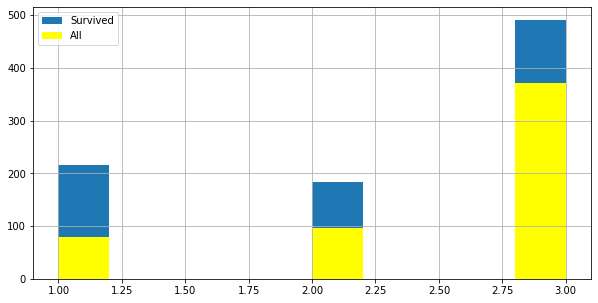

In [75]:
graf2 = TT.Pclass.hist(figsize=(10, 5), bins=10)
TT[TT.Survived == 0].Pclass.hist(figsize=(10, 5), bins=10, color='yellow')
graf2.legend(['Survived', 'All'], prop={'size': 10})

#### Видно, что чем выше класс, тем больше выживаемость

## Семья

In [77]:
#### Есть предположение, что те люди, которые ехали большой семьёй выжили меньше

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

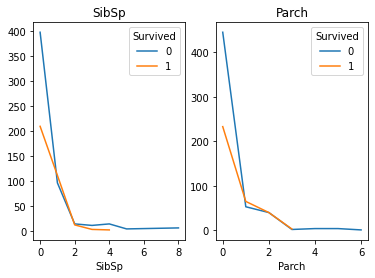

In [86]:
fig, axes = plt.subplots(ncols=2)
TT.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
TT.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

#### Таким образом видно, что чем больше членов семьи на борту, тем больше смерность.

## Интересное предположение про порт

#### Бытует мнение, что выживаемость зависит от порта, в котором сел человек

In [88]:
TT.Embarked.value_counts() # Посчитаем, сколько людей где село

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
(100 * TT.Embarked.value_counts() / TT.PassengerId.nunique()).apply(lambda x: '{} %'.format(round(x)))
# видно, что у двоих пассажиров не указан пор, поэтому присвоим им порт S, так как там село больше всего людей и это не сильно нарушит результат

S    73 %
C    19 %
Q     9 %
Name: Embarked, dtype: object

In [94]:
TT[['Embarked', 'Survived']].groupby(['Embarked']).mean().apply(lambda x: round(100 * x))

,Survived
Embarked,
C,55.0
Q,39.0
S,34.0


#### Из таблицы видно, что порт - не такой важный параметр виживаемости

## Вывод

### В данной работе мы проанализировали некоторые данные по "Титанику" с сайта Kaggle. Установили, что на выживаемость во время этой катастрофы влияли такие факторы, как пол, класс и колличество членов семьи на борту, а такой признак, как порт посадки особо на это не повлиял